<a href="https://colab.research.google.com/github/AnnaKul5/Machine-learning-and-data-analysis/blob/HomeWork6/MachineLearningLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Содержательное описание задачи

«Набор данных о поведении клиентов и покупках в электронной коммерции» — это синтетический набор данных, созданный с использованием библиотеки Faker Python. Он моделирует комплексную среду электронной коммерции, фиксируя различные аспекты поведения клиентов и историю покупок на цифровом рынке. Этот набор данных подходит для таких задач, как прогнозирование оттока клиентов, анализ потребительской корзины, системы рекомендаций и анализ тенденций.

---
Задача прогнозирования состоит в том, чтобы определить отток клиентов. То есть опираясь на предложенные данные нужно  решить задачу классифицикации с двумя классами:


*   Клиент ушёл
*   Клиент остался




# Загрузка и описание даных

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

df = pd.read_csv("/content/ecommerce_customer_data_large.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [ ]:


df.shape      # Размерность датасета (Объём данных: 250000 (строк); количество признаков: 13 (столбцов))

(250000, 13)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


**Набор данных содержит следующие столбцы:**



1.   Customer ID: уникальный идентификатор для каждого клиента.
2.   Purchase Date: дата каждой покупки, совершенной покупателем.
3.   Product Category: категория или тип приобретенного продукта.
4.   Product Price: цена приобретенного продукта.
5.   Quantity: количество приобретенного товара.
6.   Total Purchase Amount: общая сумма, потраченная клиентом в каждой транзакции.
7.   Payment Method : способ оплаты, используемый клиентом.
8.   Customer Age: возраст клиента (генерируется Faker).
9.   Returns: возвратил ли клиент какие-либо продукты из заказа (двоичный код: 0 — возврат невозвратный, 1 — возврат).
10.  Customer Name: имя клиента.
11.  Age: возвраст клиента.
12.  Gender: пол клиента.
13.  Churn: двоичный столбец, показывающий, ушел ли клиент (0 — клиент остался, 1 — клиент ушёл). Предсказываемое значение.

Признаки Returns и Churn - бинарные.

Признаки Genre, Product Category, Payment Method - категориальные (нормированнные).

Признаки Customer ID, Product Price, Quantity, Total Purchase Amount, Customer Age, Age - числовые (непрерывные).

Даты (признак Purchase Date) нужно преобразовать из строк в дату и время.

---

Исключим признаки, которые не стоит использовать для обучения модели, так как она не влияют на решение клиента перестать пользоваться услугами магазина: Customer ID, Customer Name. Признаки Age и Customer Age дублируют друг друга, поэтому один из них можно исключить.

Бинарные признаки можно считать как категориальными неупорядоченными так и числовыми. В данной задаче примем признаки Returns и Churn за категориальные признаки (возвраты можно разделить на 2 категории: был возврат или нет. То же самое и с уходом клиента).

In [ ]:
data = df.drop(['Customer ID', 'Customer Name', 'Customer Age'], axis=1)
data['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
data

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,31,Female,0
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,31,Female,0
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,31,Female,0
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,31,Female,0
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,31,Female,0
...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,0.0,63,Male,0
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,1.0,66,Female,0
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,NaN,63,Female,0
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,1.0,64,Male,0


In [ ]:
data['Product Category'] = data['Product Category'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Returns'] = data['Returns'].astype('category')
data['Churn'] = data['Churn'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Purchase Date          250000 non-null  datetime64[ns]
 1   Product Category       250000 non-null  category      
 2   Product Price          250000 non-null  int64         
 3   Quantity               250000 non-null  int64         
 4   Total Purchase Amount  250000 non-null  int64         
 5   Payment Method         250000 non-null  category      
 6   Returns                202618 non-null  category      
 7   Age                    250000 non-null  int64         
 8   Gender                 250000 non-null  category      
 9   Churn                  250000 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(4)
memory usage: 10.7 MB


# Информация о числовых значениях

In [ ]:
data.describe(include=['int64'])

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,254.742724,3.004936,2725.385196,43.798276
std,141.738104,1.414737,1442.576095,15.364915
min,10.000000,1.000000,100.000000,18.000000
25%,132.000000,2.000000,1476.000000,30.000000
50%,255.000000,3.000000,2725.000000,44.000000
75%,377.000000,4.000000,3975.000000,57.000000
max,500.000000,5.000000,5350.000000,70.000000


*   min – минимальное значение признака
*   max – максимальное значение признака
*   mean – среднее значение
*   std – среднеквадратическое отклонение
*   25% – первый квартиль – значение, ниже которого лежит 25% значений
*   50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
*   75% – третий квартиль – значение, ниже которого лежит около 75% значений

Нет пропущенных значений.

**Построим матрицу корелляции для числовых признаков:**

In [ ]:
corrMatrix = data.select_dtypes(include=['int64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Product Price,Quantity,Total Purchase Amount,Age
Product Price,1.000000,0.002339,-0.001297,0.002214
Quantity,0.002339,1.000000,0.001234,-0.000180
Total Purchase Amount,-0.001297,0.001234,1.000000,0.056552
Age,0.002214,-0.000180,0.056552,1.000000


Очень странно, что цена продукта не кореллирует с общей суммой покупки. Также странно, что количество приобретённого товара не кореллирует с итоговой стоимостью. Наблюдается наибольшая кореляция возраста клиента и итоговой стоимости.

Из этого можно сделать вывод о ненадёжности данных. Скорее всего такая ошибка возникла из-за их неправильной генерации.

# Информация о категориальных и бинарных признаках

In [ ]:
data.describe(include=['category'])

,Product Category,Payment Method,Returns,Gender,Churn
count,250000,250000,202618.0,250000,250000
unique,4,3,2.0,2,2
top,Electronics,Credit Card,1.0,Male,0
freq,62630,83547,101476.0,125676,199870


*   unique - это количество уникальных значений в признаке
*   top - это наиболее распространенное значение
*   freq - это частота наиболее распространенного значения


---


1. Мы можем видеть, что есть 4 уникальных категории продуктов и 3 уникальных категории методов оплаты.
2. Наиболее распространенная категория продуктов - это электроника.
3. Наиболее распространенная категория методов оплаты - это оплата по кредитной карте.
4. Большинство покупателей - мужчины, но их не намного больше, чем женщин. Процентное соотношение почти 50 на 50.
5. Наиболее распространенён возврат товаров и уход (отток) клиентов.
6. При том, что было сделано меньше половины возвратов (около 40%), отток клиентов составляет около 80%.

Имеются пропущенные значения (у признака Returns).


# Визуализация данных

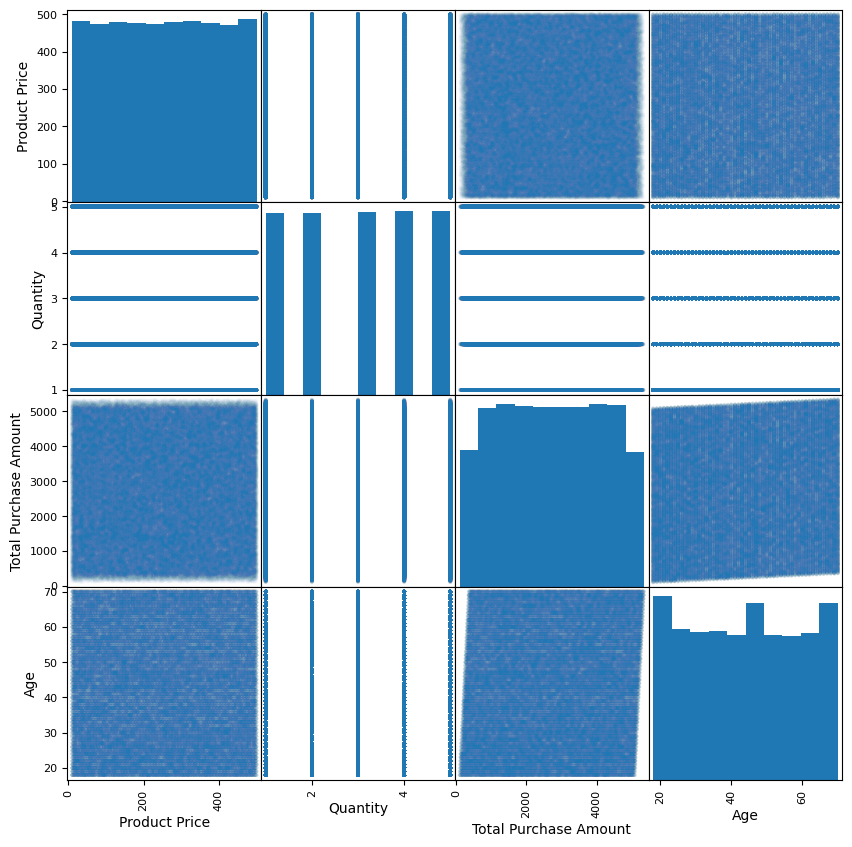

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

array([[<Axes: title={'center': 'Purchase Date'}>,
        <Axes: title={'center': 'Product Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total Purchase Amount'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

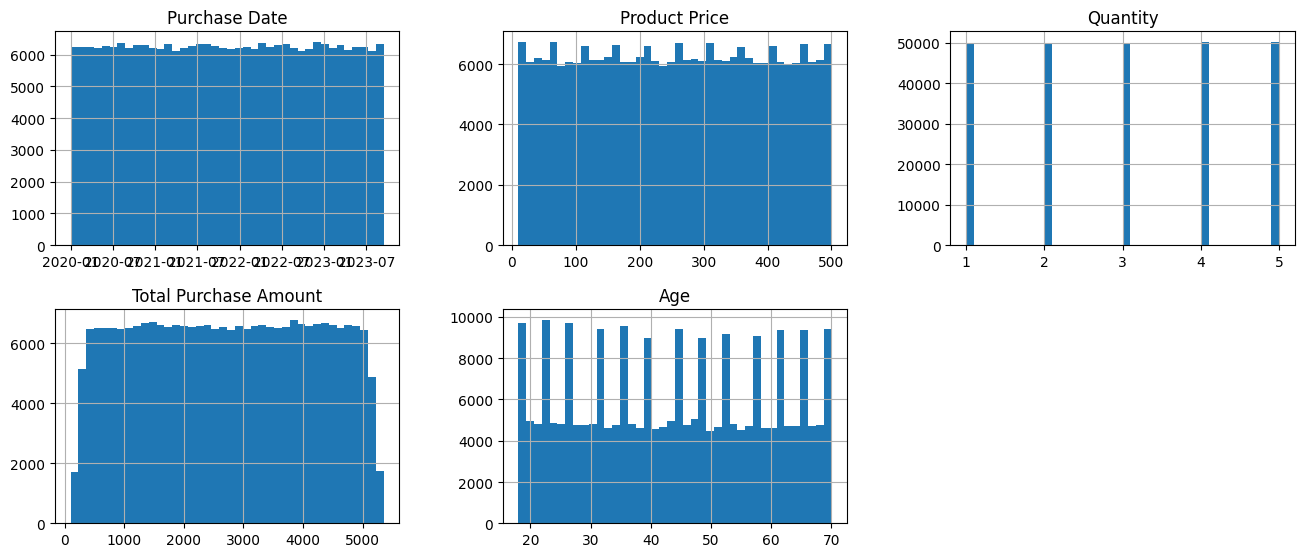

In [ ]:
data.hist(bins=40, layout=(3,3), figsize=(16,10))

По гистограммам не наблюдаем выбросов.

# Обработка пропущенных значений

Эффективным и простым методом обработки является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.


In [ ]:
data.isnull().sum()        #убедились, что пропущенные значения есть только у категориального признака Returns

Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [ ]:
data['Returns'].describe()

count     202618.0
unique         2.0
top            1.0
freq      101476.0
Name: Returns, dtype: float64

In [ ]:
data['Returns'] = data['Returns'].fillna(1.0)
data['Returns'].describe()

count     250000.0
unique         2.0
top            1.0
freq      148858.0
Name: Returns, dtype: float64

# Обработка категориальных признаков

Закодируем категориальные признаки с использованием OneHotEncoder числовыми признаками.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn']])

dummies = pd.DataFrame(enc.transform(data[['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn']]),
                       columns=enc.get_feature_names_out(), index=data.index)

In [ ]:
data1 = pd.concat((data, dummies), axis=1).drop(['Product Category',	'Payment Method', 'Gender', 'Returns', 'Churn'], axis=1)
data1

,Purchase Date,Product Price,Quantity,Total Purchase Amount,Age,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male,Returns_1.0,Churn_1
0,2023-05-03 21:30:02,177,1,2427,31,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2021-05-16 13:57:44,174,3,2448,31,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2020-07-13 06:16:57,413,1,2345,31,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2023-01-17 13:14:36,396,3,937,31,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-01 11:29:27,259,4,2598,31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,436,1,3664,63,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
249996,2021-06-04 05:45:25,233,1,4374,66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
249997,2022-11-10 17:11:57,441,5,5296,63,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
249998,2021-06-27 14:42:12,44,2,2517,64,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Purchase Date                 250000 non-null  datetime64[ns]
 1   Product Price                 250000 non-null  int64         
 2   Quantity                      250000 non-null  int64         
 3   Total Purchase Amount         250000 non-null  int64         
 4   Age                           250000 non-null  int64         
 5   Product Category_Books        250000 non-null  float64       
 6   Product Category_Clothing     250000 non-null  float64       
 7   Product Category_Electronics  250000 non-null  float64       
 8   Product Category_Home         250000 non-null  float64       
 9   Payment Method_Cash           250000 non-null  float64       
 10  Payment Method_Credit Card    250000 non-null  float64       
 11  Payment Metho

# Нормализация

Проводим MinMax нормализацию, чтобы все переменные были в диапазоне от 0 до 1.

In [ ]:
cols_to_norm = ['Product Price',	'Quantity',	'Total Purchase Amount',	'Age']
data_numerical = data[cols_to_norm]
data_numerical.describe()

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,254.742724,3.004936,2725.385196,43.798276
std,141.738104,1.414737,1442.576095,15.364915
min,10.000000,1.000000,100.000000,18.000000
25%,132.000000,2.000000,1476.000000,30.000000
50%,255.000000,3.000000,2725.000000,44.000000
75%,377.000000,4.000000,3975.000000,57.000000
max,500.000000,5.000000,5350.000000,70.000000


In [ ]:
data_numerical = (data_numerical - data_numerical.min(axis = 0))/(data_numerical.max(axis = 0) - data_numerical.min(axis = 0))
data_numerical.describe()

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.499475,0.501234,0.500073,0.496121
std,0.289261,0.353684,0.274776,0.295479
min,0.000000,0.000000,0.000000,0.000000
25%,0.248980,0.250000,0.262095,0.230769
50%,0.500000,0.500000,0.500000,0.500000
75%,0.748980,0.750000,0.738095,0.750000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_numerical

,Product Price,Quantity,Total Purchase Amount,Age
0,0.340816,0.00,0.443238,0.250000
1,0.334694,0.50,0.447238,0.250000
2,0.822449,0.00,0.427619,0.250000
3,0.787755,0.50,0.159429,0.250000
4,0.508163,0.75,0.475810,0.250000
...,...,...,...,...
249995,0.869388,0.00,0.678857,0.865385
249996,0.455102,0.00,0.814095,0.923077
249997,0.879592,1.00,0.989714,0.865385
249998,0.069388,0.25,0.460381,0.884615


Если мы будем использовать классификатор ближайших соседей (knn), то следует учесть, что разные атрибуты обычно обладают разным диапазоном представленных значений в выборке. Значения дистанции могут сильно зависеть от атрибутов с более широкими диапазонами. Поэтому данные обычно подлежат нормализации.

Однако, учитывая размер исходного датасета(250000 строк) и необходимость хранить обучающую выборку при использовании классификатора ближайших соседей, был сделан выбор использовать **случайный лес**.

# Разбиение на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

data1['Purchase Date'] = data1['Purchase Date'].astype('int64') / 10**9

y = data1['Churn_1']
data1 = data1.drop(columns=['Churn_1'])
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test       #количество строк в обучающей и тестовой выборках

(175000, 75000)

Разбили выборку на обучающую, которая составляет 70% от изначальной выборки, и тестовую - 30% от изначальной выборки.

# Случайный лес

В качестве классификатора был выбран случайный лес ввиду его высокой точности, устойчивости к переобучению и способности к эффективной обработке больших объёмов данных. Однако время работы классификатора всё равно получилось достаточно долгим.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()

grid = GridSearchCV(rf, cv=5, param_grid = {'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]},scoring='roc_auc',verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   5.1s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   6.1s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   5.0s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   5.2s
[CV] END ......................max_depth=3, max_leaf_nodes=3; total time=   6.1s
[CV] END ......................max_depth=3, max_leaf_nodes=6; total time=   5.7s
[CV] END ......................max_depth=3, max_leaf_nodes=6; total time=   6.8s
[CV] END ......................max_depth=3, max_leaf_nodes=6; total time=   5.9s
[CV] END ......................max_depth=3, max_leaf_nodes=6; total time=   6.9s
[CV] END ......................max_depth=3, max_leaf_nodes=6; total time=   6.3s
[CV] END ......................max_depth=3, max_leaf_nodes=9; total time=   6.8s
[CV] END ......................max_depth=3, max_l

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]},
             scoring='roc_auc', verbose=2)

# Выбор оптимального значения гиперпараметра

In [ ]:
grid.best_params_

{'max_depth': 9, 'max_leaf_nodes': 9}

**Обучение модели**

In [ ]:
rfst = ensemble.RandomForestClassifier(max_depth = grid.best_params_['max_depth'],max_leaf_nodes = grid.best_params_['max_leaf_nodes'])
rfst.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9)

# Вычисление ошибки на обучающей и тестовой выборке

In [ ]:
err_train = np.mean(y_train != rfst.predict(X_train))
err_test  = np.mean(y_test  != rfst.predict(X_test))

print(err_train, err_test)

0.20073142857142856 0.20002666666666666


# Итоги

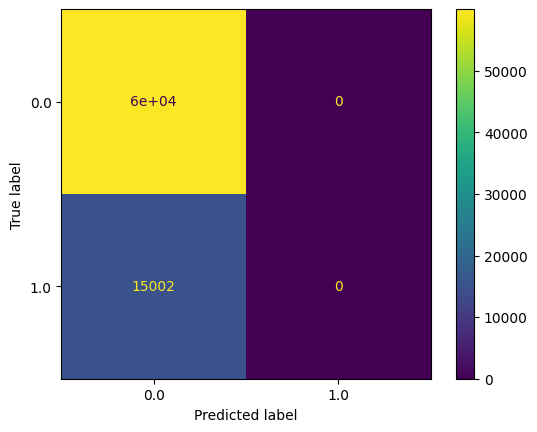

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfst.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfst.classes_)
disp.plot()
plt.show()

Из-за дисбаланса классов возникает следующая проблема. В нашем датасете преобладает число удержанных клиентов над числом ушедших (80%/20%). Так как на обучающей выборке число ушедших покупателей было мало, мы не смогли получить хорошего результата в определении ушедших покупателей. Фактически мы получили константную модель, которая всем присвоила 0.

# Решающее дерево

Обучаем решающее дерево, подбираем параметры с помощью GridSearch.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18]
}

# Выбор оптимального значения гиперпараметров

In [ ]:
from sklearn.metrics import roc_auc_score
gs = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10,scoring='roc_auc',verbose = 2)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, mi

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15]},
             scoring='roc_auc', verbose=2)

In [ ]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2}

In [ ]:
dtc = DecisionTreeClassifier(criterion = gs.best_params_['criterion'],max_depth = gs.best_params_['max_depth'],
                              min_samples_leaf = gs.best_params_['min_samples_leaf'])
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

# Матрица рассогласования

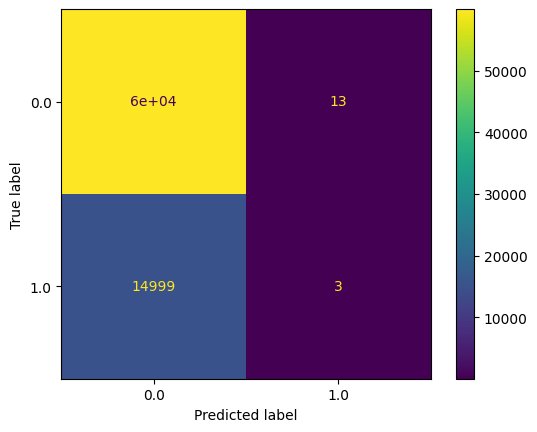

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dtc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)
disp.plot()
plt.show()

# Вычисление ошибки на обучающей и тестовой выборке

In [ ]:
err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))

print(err_train, err_test)

0.20062285714285713 0.20016


# ROC-AUC

In [ ]:
pred_dtc = dtc.predict_proba(X_test)[:,1]
print('test roc-auc: ',roc_auc_score(y_test, pred_dtc))

test roc-auc:  0.5172031892019828


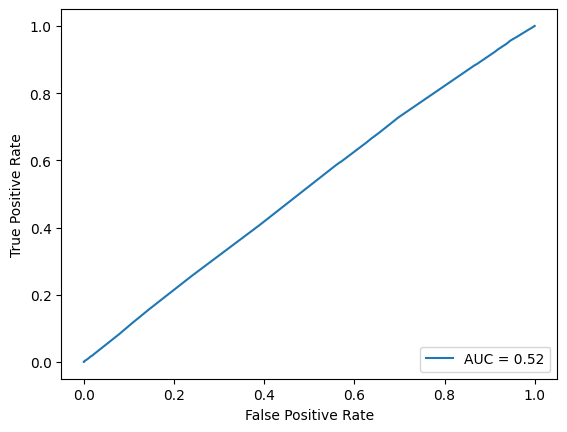

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_dtc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

# Выбор оптимального значения гиперпараметра C

In [ ]:
listC = [1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
param = {
    'C':listC
}

In [ ]:
gs = GridSearchCV(LogisticRegression(), param, cv=10,scoring='roc_auc',verbose = 2)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.4s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.8s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=1; total time=   0.7s
[CV] END ................................................C=2; total time=   0.6s
[CV] END .....................................

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
             scoring='roc_auc', verbose=2)

In [ ]:
gs.best_params_

{'C': 1}

In [ ]:
logreg = LogisticRegression(C = gs.best_params_['C'])
logreg.fit(X_train, y_train)

LogisticRegression(C=1)

# Матрица рассогласования

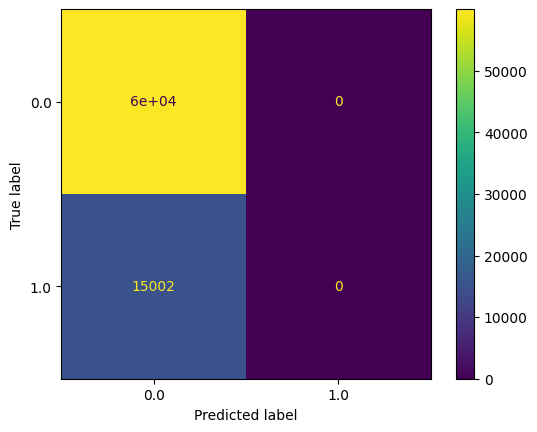

In [ ]:
cm = confusion_matrix(y_test, logreg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
plt.show()

# Вычисление ошибки на обучающей и тестовой выборке

In [ ]:
err_train = np.mean(y_train != logreg.predict(X_train))
err_test  = np.mean(y_test  != logreg.predict(X_test))

print(err_train, err_test)

0.20073142857142856 0.20002666666666666


# ROC-AUC

In [ ]:
pred_logreg = logreg.predict_proba(X_test)[:,1]
print('test roc-auc: ',roc_auc_score(y_test, pred_logreg))

test roc-auc:  0.5004340154892689


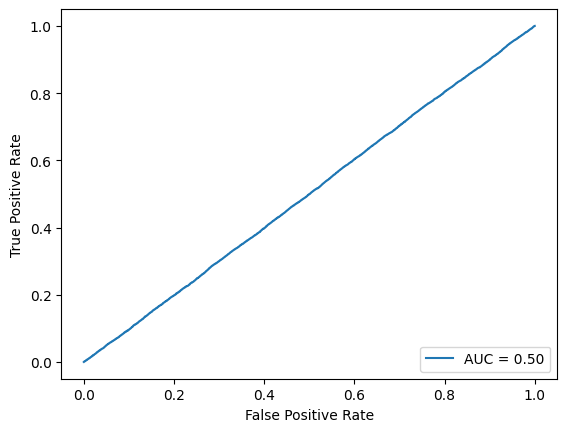

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_logreg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

# Нейронная сеть

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(14, 40)
        self.linear2 = nn.Linear(40, 2)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [ ]:
X_train = torch.from_numpy(X_train.to_numpy()).to(torch.float32)
y_train = torch.from_numpy(y_train.to_numpy()).type_as(X_train)
X_test = torch.from_numpy(X_test.to_numpy()).to(torch.float32)
y_test = torch.from_numpy(y_test.to_numpy()).type_as(X_test)

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=256)
test_loader = DataLoader(test_dataset, batch_size=250)

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model.to(device)
device

device(type='cpu')

In [ ]:
epochs=np.arange(1,50)
loss_list=[]
for epoch in epochs:
    Loss=0
    for iteration, (X_batch, y_batch) in enumerate(train_loader):
        X_batch=X_batch.to(device)
        y_batch=y_batch.to(device)
        output = model(X_batch)
        loss = criterion(output, y_batch.long())
        Loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(Loss)
    print(f'Epoch:{epoch}, Loss:{Loss:.4f}')

Epoch:1, Loss:746812874.6562
Epoch:2, Loss:543503744.4375
Epoch:3, Loss:641234741.6562
Epoch:4, Loss:493849652.9688
Epoch:5, Loss:496402188.5234
Epoch:6, Loss:552414013.4688
Epoch:7, Loss:513287571.6250
Epoch:8, Loss:514116836.9062
Epoch:9, Loss:481471335.1875
Epoch:10, Loss:512563944.4219
Epoch:11, Loss:471858743.9375
Epoch:12, Loss:546557695.5938
Epoch:13, Loss:477168483.9375
Epoch:14, Loss:449236096.0312
Epoch:15, Loss:472535084.2188
Epoch:16, Loss:454229888.5000
Epoch:17, Loss:386269235.6875
Epoch:18, Loss:413478242.2500
Epoch:19, Loss:516007014.1875
Epoch:20, Loss:421748598.8750
Epoch:21, Loss:408788477.0000
Epoch:22, Loss:389338439.9258
Epoch:23, Loss:423662937.2500
Epoch:24, Loss:385227377.4141
Epoch:25, Loss:381230445.8281
Epoch:26, Loss:362478228.7344
Epoch:27, Loss:324856734.8438
Epoch:28, Loss:373185915.4688
Epoch:29, Loss:425562711.7109
Epoch:30, Loss:280674169.5938
Epoch:31, Loss:282252406.4062
Epoch:32, Loss:342569838.9258
Epoch:33, Loss:323046950.8125
Epoch:34, Loss:2946

In [ ]:
model.to("cpu")
with torch.no_grad():
  labels=np.zeros(shape=(300,250))
  preds=np.zeros(shape=(300,250))
  for iteration, (X_batch, y_batch) in enumerate(test_loader):
          output = model(X_batch)
          _, predict = torch.max(output.data,1)
          labels[iteration] = y_batch.detach().numpy()
          preds[iteration] = predict.detach().numpy()

In [ ]:
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
labels=labels.flatten()
preds=preds.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, preds)

array([[59998,     0],
       [15002,     0]])

# Итог

Были обучены разные модели и подобраны гиперпараметры. Также для моделей мы построили матрицы рассогласования. В результате мы наблюдаем странное поведение - модели после обучения предсказывают на тесте одни нули, что свидетельствует об  очень плохом качестве модели. Причины могут быть две: либо есть какая то проблема в данных, либо наблюдается очень сильное переобучение. Можно более качественно посмотреть на взаимосвязь признаков, провести некий Feature Selection.|